In [6]:
# importing lib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
import seaborn as sb

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [4]:

# importing custom library 
from data_info import DataInfo
from VisualisationPlots import VisualiseDf

# Exploratory data analysis

In [9]:
# reading file
df_am = pd.read_csv('../data/Amharic News Dataset.csv')

# view shuffled info
df_am = shuffle(df_am)
df_am.head(10)

,headline,category,date,views,article,link
943,የኢትዮጵያ ፕሪሚየር ሊግ 18ኛ ሳምንት ጨዋታዎች,ስፖርት,"March 29, 2019",30,የኢትዮጵያ ፕሪሚየር ሊግ የ18ኛ ሳምንት ሁሉም ጨዋታዎች በክልል ከተሞች ...,https://www.press.et/Ama/?p=7830
36305,የቀድሞው የአሜሪካ ድምጽ የራዲዮ ፕሮግራም አቀናባሪ - የዛሬው ድምጻዊ,ሀገር አቀፍ ዜና,"January 15, 2020",Unknown,የዕድሜውን አብላጫ ጊዜ በራዲዮ ፕሮግራም አቀናባሪነት ነው የሰራው። ከሰላ...,https://amharic.voanews.com//a/a-conversation-...
18466,ጠ/ሚ ዐቢይ ተደራራቢ የከተማ ግብርና ማሳያ ስፍራን ጎበኙ,ሀገር አቀፍ ዜና,"Dec 27, 2019","1,673",አዲስ አበባ ፣ ታህሳስ 17 ፣ 2012 (ኤፍ ቢ ሲ) ጠቅላይ ሚኒስትር ዐ...,https://www.fanabc.com/%e1%8c%a0-%e1%88%9a-%e1...
41026,በመኬን ጤና የጤናው ድምፅ ዘገየ,ዓለም አቀፍ ዜና,"July 17, 2017",Unknown,የአሜሪካ የጤና ጉዳይ ከሰሞኑ የዋሺንግተን የፖለቲካ ግለት አካባቢዎች ጉዳ...,https://amharic.voanews.com//a/health-7-17-201...
23693,የኢትዮጵያ ኤሌክትሪክ አገልግሎት በክልል ደረጃ በድጋሚ ሊዋቀር ነው,ቢዝነስ,13 September 2017,Unknown,ከቀድሞው የኢትዮጵያ ኤሌክትሪክ ኃይል ኮርፖሬሽን ተከፍሎ የወጣው የኢትዮጵ...,https://www.ethiopianreporter.com/content/%E1%...
32840,​በቻምፒየንስ ሊግ ፍፃሜ የመጀመርያ ጨዋታ አል አህሊ እና ዋይዳድ አቻ ተ...,ስፖርት,"October 29, 2017",Unknown,በቶታል ካፍ ቻምፒየንስ ሊግ ፍፃሜ የመጀመሪያ ጨዋታ አሌክሳንደሪያ ላይ የ...,https://soccerethiopia.net/football/30984
2892,‹‹ብልጽግና ፓርቲ የምርጫ መወዳደሪያ ሜዳው ሁሉንም እንዲያሳትፍ እየሰራ ...,ሀገር አቀፍ ዜና,"February 13, 2020",74,አዲስ አበባ፡- የምርጫ ሜዳውን የሰፋ ከማድረግ አንጻር የብልጽግና ፓርቲ ...,https://www.press.et/Ama/?p=27184
50471,ባለፉት ሁለት ዓመታት በሴት አርብቶ አደሮች ላይ በተሰሩ ስራዎች አመርቂ ...,ሀገር አቀፍ ዜና,"December 31, 2020",Unknown,ሴት አርብቶ አደሮቹ የተሻለ የኢኮኖሚ አቅም እንዲኖራቸው ለማስቻል በተወሰ...,https://waltainfo.com/am/%e1%89%a3%e1%88%88%e1...
49386,የሱዳን የሽግግር መንግስት በአደባባይ ከሚቃወሙ ዜጎች ጋር ተነጋገረ,ፖለቲካ,"April 15, 2019",Unknown,የሱዳንን የሽግግር መንግስት ለማስተዳደር ቦታውን የተረከቡት ሌተናል ጄኔራ...,https://waltainfo.com/am/33262/
33456,የጨዋታ ሪፖርት | ቅዱስ ጊዮርጊስ የወልድያን በሜዳ ያለመሸነፍ ጉዞ ገትቷል,ስፖርት,"April 26, 2017",Unknown,የኢትዮጵያ ፕሪምየር ሊግ 25ኛ ሳምንት ዛሬም ቀጥሎ ሲውል ወደ ወልድያ ያ...,https://soccerethiopia.net/football/27808


In [10]:
# information
df_info = DataInfo(df_am)

In [11]:
# shape of the data source
df_info.shape_df()

Dataframe contains 51483 rows and 6 columns


In [12]:
# null
df_info.get_count_null()

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64


In [13]:
# really few null values
df_info.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


In [14]:
#General info
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 943 to 40023
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB
None


## Data cleaning
- Null values need to be handled 
- view variable datatype need to be int

In [15]:
# dropping the null values
df_am.dropna(inplace = True)

In [16]:
df_am.isna().any().sum()

0

## let's see some distributions  

In [17]:
df_am.columns

Index(['headline', 'category', 'date', 'views', 'article', 'link'], dtype='object')

In [18]:
df_am['category'].value_counts()

ሀገር አቀፍ ዜና    20665
ስፖርት          10411
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            632
Name: category, dtype: int64

In [20]:
## news category analysis
# df_am['category'].value_counts().plot(kind='barh')

In [21]:
# the notebook is rendering the amharic text 
# so it should be replaced with english words 
df_am['category'] = df_am['category'].replace(['ሀገር አቀፍ ዜና', 'ስፖርት', 'ፖለቲካ', 'ዓለም አቀፍ ዜና','ቢዝነስ','መዝናኛ'], ['NationWide News', 'Sport', 'Politics', 'Worldwide News','Business','Entertainment'])

In [22]:
df_am['category'] = df_am['category'].replace(['ሀገር አቀፍ ዜና', 'ስፖርት', 'ፖለቲካ', 'ዓለም አቀፍ ዜና','ቢዝነስ','መዝናኛ'], ['NationWide News', 'Sport', 'Politics', 'Worldwide News','Business','Entertainment'])

> the dataset contains mostly about news agency and sports

### Data sets are strings which contains long sentences 
>- Needs to change into more manageble and seuitable for analysis
>- the string length method would be applied
>- So the article and headline will be converted here(these variables are the most interested feature for the project)

In [23]:
# creating new dataframe based on the existed dataframe
df_am_clean=pd.DataFrame()
df_am_clean['article_char_word'] = df_am['article'].str.len()
df_am_clean['article_word_length'] = df_am['article'].str.split().str.len()
df_am_clean['headline_char_length'] = df_am['headline'].str.len()
df_am_clean['headline_word_length'] = df_am['headline'].str.split().str.len()
df_am_clean['category'] = df_am['category']


In [25]:
df_am.head(2)

,headline,category,date,views,article,link
943,የኢትዮጵያ ፕሪሚየር ሊግ 18ኛ ሳምንት ጨዋታዎች,Sport,"March 29, 2019",30,የኢትዮጵያ ፕሪሚየር ሊግ የ18ኛ ሳምንት ሁሉም ጨዋታዎች በክልል ከተሞች ...,https://www.press.et/Ama/?p=7830
36305,የቀድሞው የአሜሪካ ድምጽ የራዲዮ ፕሮግራም አቀናባሪ - የዛሬው ድምጻዊ,NationWide News,"January 15, 2020",Unknown,የዕድሜውን አብላጫ ጊዜ በራዲዮ ፕሮግራም አቀናባሪነት ነው የሰራው። ከሰላ...,https://amharic.voanews.com//a/a-conversation-...


In [24]:
df_am_clean.head(2)

,article_char_word,article_word_length,headline_char_length,headline_word_length,category
943,869,182,30,6,Sport
36305,181,37,44,9,NationWide News


The transformed data set for making visualizations

In [26]:
df_am_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51470 entries, 943 to 40023
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   article_char_word     51470 non-null  int64 
 1   article_word_length   51470 non-null  int64 
 2   headline_char_length  51470 non-null  int64 
 3   headline_word_length  51470 non-null  int64 
 4   category              51470 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB


## Visualizers

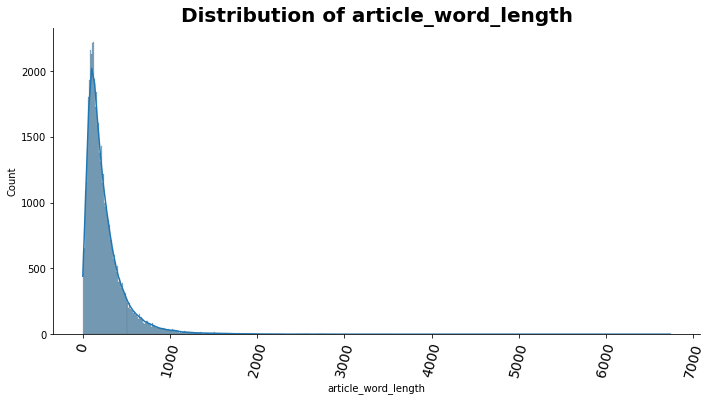

In [27]:
# distribution of 
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'article_word_length', color)

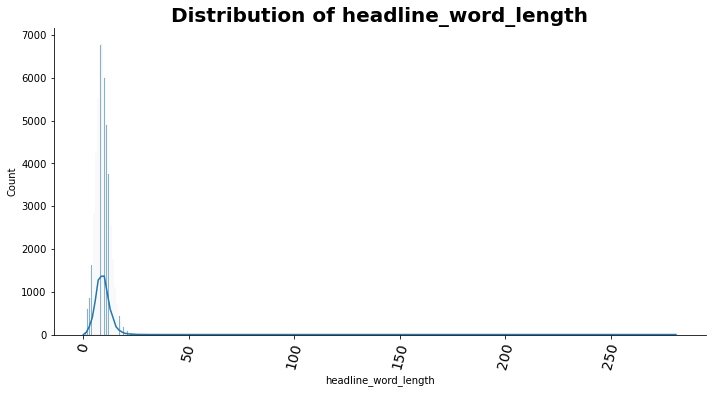

In [49]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'headline_word_length', color)

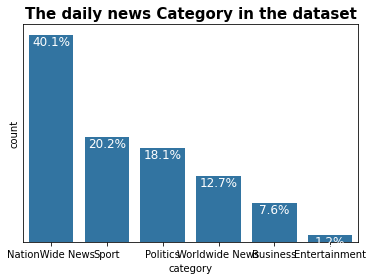

In [56]:
# The distribution of news Category in the dataset
plt.title("The news Category in the dataset", size=15, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_am_clean, df_am_clean['category'])


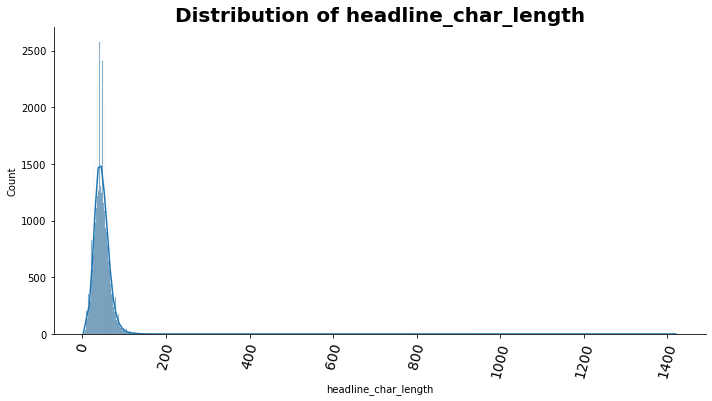

In [89]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'headline_char_length', color)

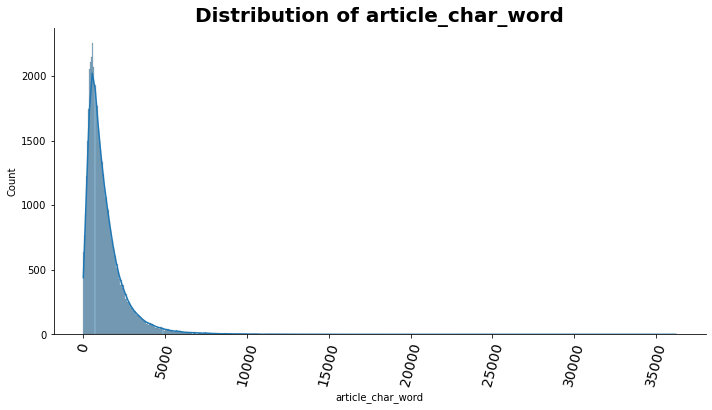

In [91]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'article_char_word', color)

### Headline analysis on each category news

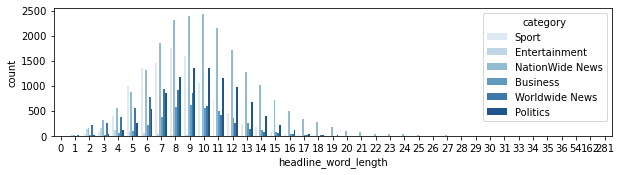

In [93]:
plt.figure(figsize = [10, 8])
plt.subplot(3, 1, 1)
sb.countplot(data = df_am_clean, x = 'headline_word_length', hue = 'category', palette = 'Blues')

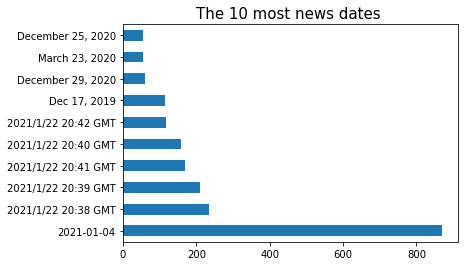

In [101]:

# Distribution of dates in terms of broadcasted news 
plt.title(f'The 10 most news dates ', fontsize=15)
df_am.date.value_counts(ascending = False).head(10).plot(kind ='barh');



x### Article analysis on each category news

In [106]:
# 
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_am_clean, x = 'article_char_word', hue = 'category', palette = 'Blues')
ax.legend(ncol = 4) 